In [1]:
import torch
import torch.nn as nn
import math
import matplotlib as plt
import seaborn as sns
# Define the Transformer model
class Transformer(nn.Module):
    def __init__(self, input_size, output_size, num_layers, hidden_size, num_heads, dropout):
        super(Transformer, self).__init__()

        self.embedding = nn.Linear(input_size, hidden_size)
        self.pos_encoder = PositionalEncoding(hidden_size, dropout)
        encoder_layer = nn.TransformerEncoderLayer(hidden_size, num_heads, hidden_size, dropout)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        self.decoder = nn.Linear(hidden_size, output_size)

        self.init_weights()

    def init_weights(self):
        init_range = 0.1
        self.embedding.weight.data.uniform_(-init_range, init_range)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-init_range, init_range)

    def forward(self, input):
        input = self.embedding(input)  # Embedding
        input = self.pos_encoder(input)  # Positional encoding
        output = self.encoder(input)  # Encoding
        output = self.decoder(output)  # Linear layer
        return output

# Define the positional encoding module
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

# Generate training data (a sine wave)
def generate_data(n, freq):
    x = torch.arange(n, dtype=torch.float32)
    y = torch.sin(x * freq)
    return y.unsqueeze(1)

# Train the model to replicate a sine wave
input_size = 1
output_size = 1
num_layers = 4
hidden_size = 32
num_heads = 4
dropout = 0.1
lr = 0.001
num_epochs = 250

model = Transformer(input_size, output_size, num_layers, hidden_size, num_heads, dropout)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

for epoch in range(num_epochs):
    optimizer.zero_grad()
    x = generate_data(100, 0.1)  # Generate a sine wave with frequency 0.1
    y = generate_data(100, 0.1)
    y_pred = model(x)
    
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss={loss.item()}")

# Generate a sine wave using the trained model
x_test = generate_data(100, 0.05)  # Generate a sine wave with


C:\Users\16148\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100, 100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0: Loss=0.6838074922561646
Epoch 10: Loss=0.4230712950229645
Epoch 20: Loss=0.3906291425228119
Epoch 30: Loss=0.22129711508750916
Epoch 40: Loss=0.056498121470212936
Epoch 50: Loss=0.028270481154322624
Epoch 60: Loss=0.017607616260647774
Epoch 70: Loss=0.013945206068456173
Epoch 80: Loss=0.011611848138272762
Epoch 90: Loss=0.011980178765952587
Epoch 100: Loss=0.010546424426138401
Epoch 110: Loss=0.009717670269310474
Epoch 120: Loss=0.00926897767931223
Epoch 130: Loss=0.007243345491588116
Epoch 140: Loss=0.009189598262310028
Epoch 150: Loss=0.007570123299956322
Epoch 160: Loss=0.0064394730143249035
Epoch 170: Loss=0.006287223659455776
Epoch 180: Loss=0.007093263324350119
Epoch 190: Loss=0.006618996616452932
Epoch 200: Loss=0.005193495191633701
Epoch 210: Loss=0.005298055242747068
Epoch 220: Loss=0.004945158027112484
Epoch 230: Loss=0.005653141997754574
Epoch 240: Loss=0.005873916670680046


In [2]:
import pandas as pd

In [3]:
y_pred=model(x_test)
len(y_pred), y_pred.shape

(100, torch.Size([100, 100, 1]))

In [4]:
y_pred.squeeze()

tensor([[-0.0243,  0.0429,  0.0920,  ..., -0.8925, -0.9366, -0.9296],
        [-0.0901, -0.0021,  0.0974,  ..., -0.9443, -0.9942, -0.9634],
        [-0.0743, -0.0543,  0.1071,  ..., -0.9450, -1.0047, -0.9709],
        ...,
        [-0.0371,  0.1050,  0.0817,  ..., -0.8415, -0.9066, -0.9250],
        [-0.0155,  0.1188,  0.0830,  ..., -0.7928, -0.8797, -0.9072],
        [-0.0539, -0.0301,  0.0520,  ..., -0.9485, -0.8934, -0.9675]],
       grad_fn=<SqueezeBackward0>)

In [5]:
y_pred[0]

tensor([[-0.0243],
        [ 0.0429],
        [ 0.0920],
        [ 0.0129],
        [ 0.2941],
        [ 0.3442],
        [ 0.1426],
        [ 0.3626],
        [ 0.3110],
        [ 0.4397],
        [ 0.4678],
        [ 0.4258],
        [ 0.7093],
        [ 0.6657],
        [ 0.5668],
        [ 0.6643],
        [ 0.7563],
        [ 0.7589],
        [ 0.8825],
        [ 0.8661],
        [ 0.8087],
        [ 0.8285],
        [ 0.7771],
        [ 0.8936],
        [ 0.9359],
        [ 0.9314],
        [ 0.9545],
        [ 0.8892],
        [ 0.8975],
        [ 0.9499],
        [ 0.9845],
        [ 0.9841],
        [ 0.9062],
        [ 0.8924],
        [ 1.0020],
        [ 0.9057],
        [ 0.9104],
        [ 0.9745],
        [ 0.9411],
        [ 0.8825],
        [ 0.9160],
        [ 0.8069],
        [ 0.7261],
        [ 0.8735],
        [ 0.7635],
        [ 0.8158],
        [ 0.8386],
        [ 0.7634],
        [ 0.7988],
        [ 0.7499],
        [ 0.7231],
        [ 0.4881],
        [ 0.

In [6]:
y_pred_numpy = y_pred[0].detach().numpy()
y_pred_numpy = y_pred_numpy.reshape(-1, y_pred_numpy.shape[-1])
y_pred_df = pd.DataFrame(y_pred_numpy)
len(y_pred_df)

100

In [7]:
x_test = pd.DataFrame(x_test)
# y_pred = pd.DataFrame(y_pred)

<AxesSubplot:ylabel='0'>

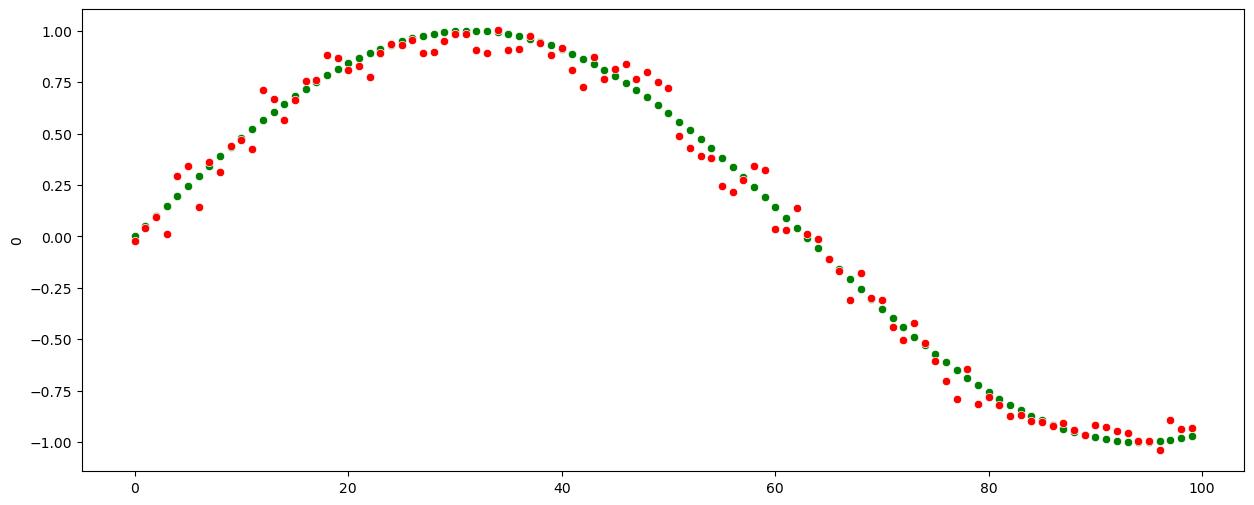

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(figsize=(15, 6))
sns.scatterplot(data=x_test,x=x_test.index, y=x_test[0], color='g')
sns.scatterplot(data=y_pred_df,x=y_pred_df.index, y=y_pred_df[0], color='r')